# Imports

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

# Linear Regression Problem

### 1

In [169]:
df = pd.read_excel("Real estate valuation data set.xlsx")

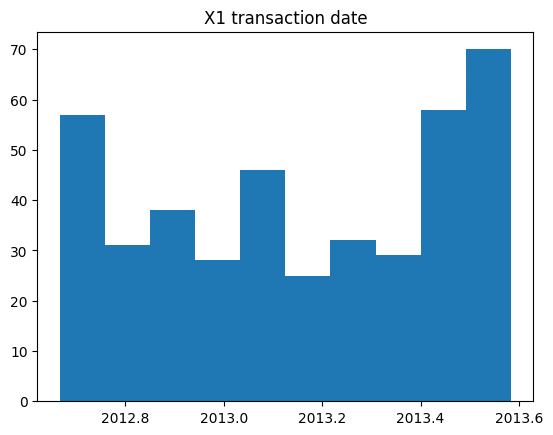

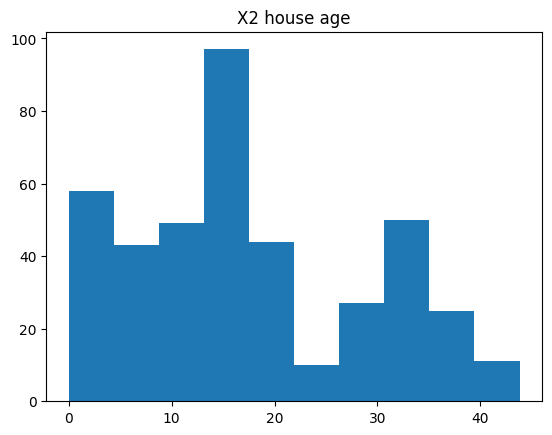

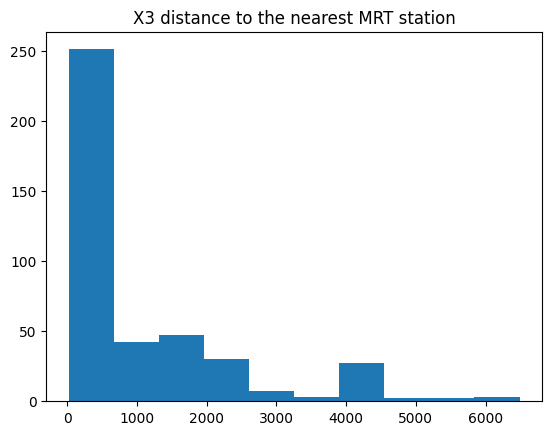

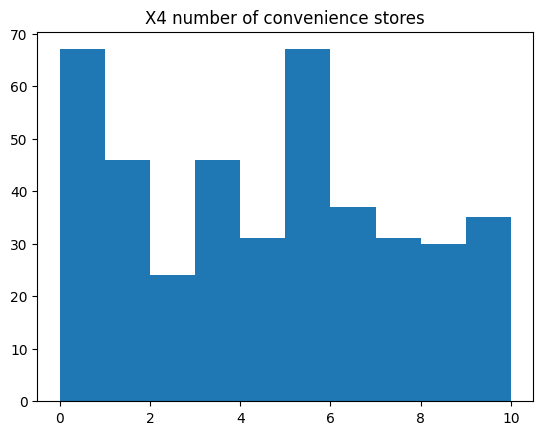

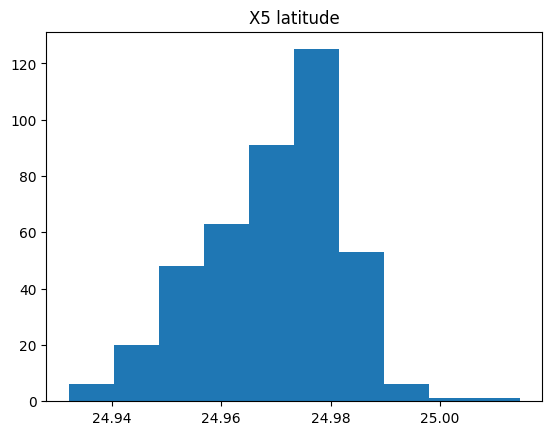

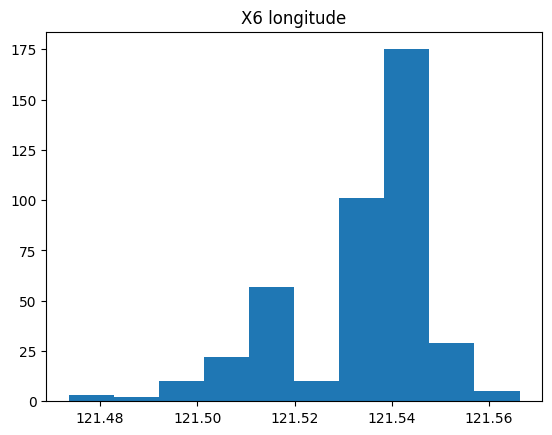

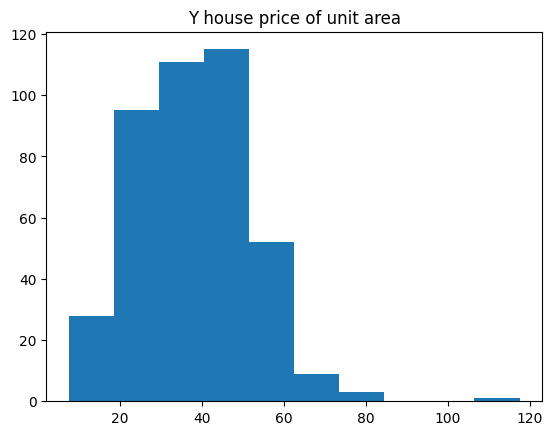

In [170]:
for title in df.columns[1:]:
    fig, ax = plt.subplots()
    ax.hist(df[title])
    ax.set_title(title)
    plt.show()

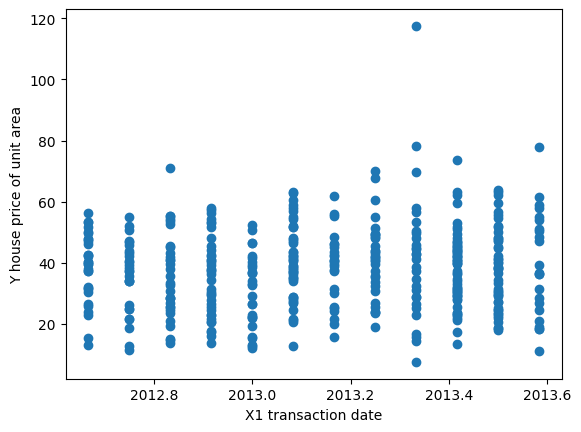

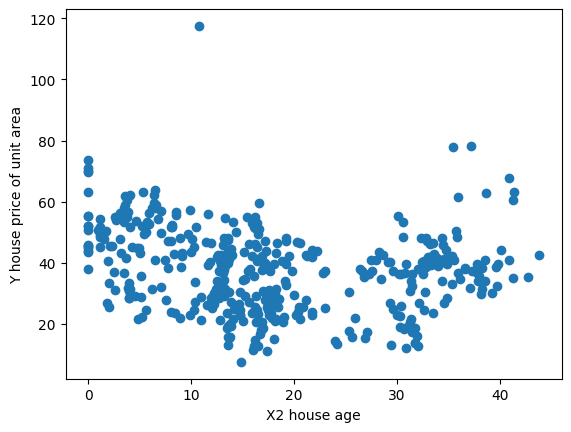

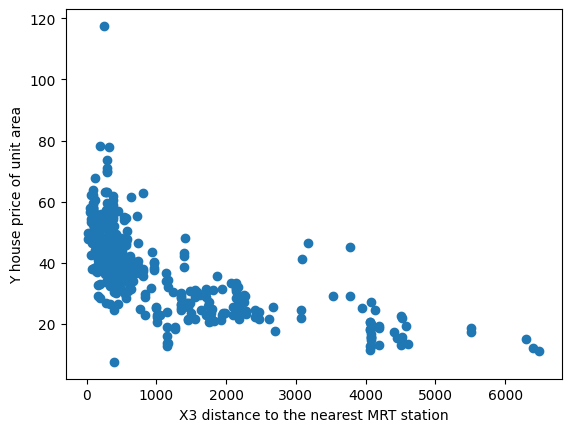

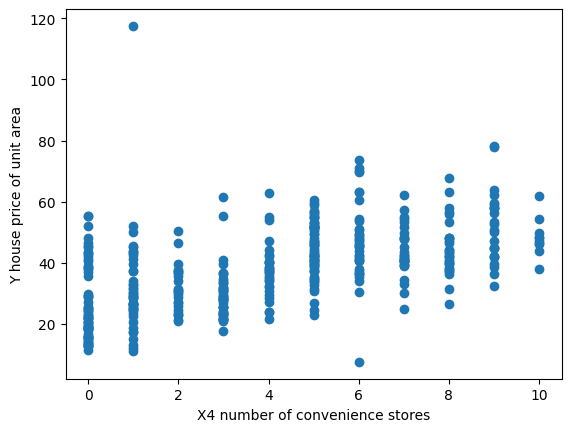

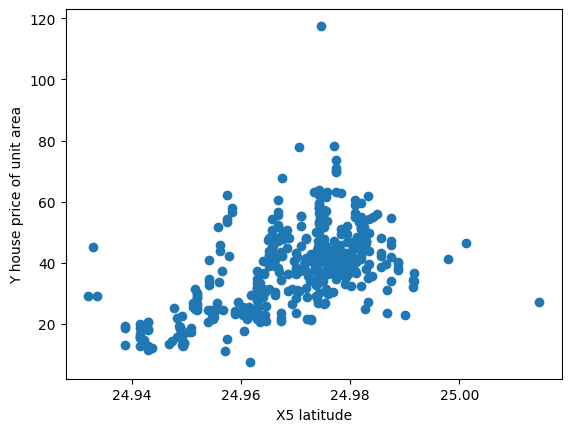

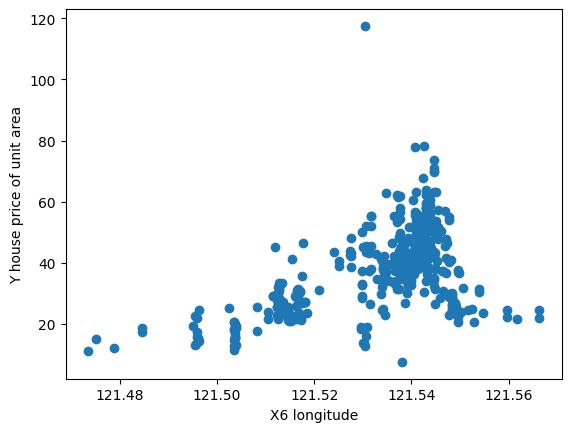

In [171]:
for title in df.columns[1:-1]:
    fig, ax = plt.subplots()
    ax.scatter(df[title], df[df.columns[-1]])
    ax.set_xlabel(title)
    ax.set_ylabel(df.columns[-1])
    plt.show()

The scatter plots reveal a potential outlier with a Y of about 120.  This data point appears as a potential outlier in every scatter plot because of how far removed it is from the rest of the Y values.  The scatter plot describing X6 and Y reveals another potential outlier in the form of a house with an especially large latitude.  If this means that the house exists in a location with especially different external conditions that are not reflected in the rest of the data then this may introduce a problem.  The X1 scatter plot shows a very slight trend of increasing value as the transaction date get closer to the present possibly indicating a small amount of predictive power.  The X2 scatter plot shows a quadratic relationship, possibly describing a trend where especially new and especially old houses are more valuable than middle-aged ones.  The X3 scatter plot shows relatively strong evidence of predictive power, indicating that distance to the nearest MRT station is inversely proportional to value.  The X4 scatter plot shows the same trend (and by extension possible predictive power) as X1.  X5 and X6 show a similar trend where larger quantities correspond to slightly higher value and may provide predictive power accordingly.

### 2

In [172]:
lin_regr = linear_model.LinearRegression()
lin_X_train, lin_X_test, lin_y_train, lin_y_test = train_test_split(df[df.columns[1:-1]], df[df.columns[-1]], test_size=0.2)


In [173]:
lin_regr.fit(lin_X_train, lin_y_train)
pred = lin_regr.predict(lin_X_test)

Predicted weights and RMSE are printed below

In [174]:
print("Weights:")
for i in range(1, len(df.columns)-1):
    print("\t", df.columns[i], ": %.4f" % lin_regr.coef_[i-1])

print("\nRMSE: %.2f" % math.sqrt(mean_squared_error(lin_y_test, pred)))

Weights:
	 X1 transaction date : 5.9479
	 X2 house age : -0.2619
	 X3 distance to the nearest MRT station : -0.0045
	 X4 number of convenience stores : 1.1624
	 X5 latitude : 225.1787
	 X6 longitude : -34.6927

RMSE: 6.70


Given the weights calculated above, price is estimated to increase by 5.9479 for each year

### 3

In [184]:
bayes_regr_models = []
bayes_X_train, bayes_X_test, bayes_y_train, bayes_y_test = train_test_split(df[df.columns[1:-1]], df[df.columns[-1]], test_size=0.2)
lambdaVals = [1, 10, 100]

In [185]:
for i in range(len(lambdaVals)):
    bayes_regr_models.append(linear_model.BayesianRidge())
    bayes_regr_models[i].set_params(lambda_1 = lambdaVals[i])
    bayes_regr_models[i].fit(bayes_X_train, bayes_y_train)

Predicted weights for each value of initial lambda are printed below

In [186]:
for i in range(len(lambdaVals)):
    print("Lambda = ", lambdaVals[i])
    print("\tWeights:")
    for j in range(1, len(df.columns)-1):
        print("\t\t", df.columns[j], ": ", bayes_regr_models[i].coef_[j-1])

Lambda =  1
	Weights:
		 X1 transaction date :  0.8720912680427552
		 X2 house age :  -0.24094902605986024
		 X3 distance to the nearest MRT station :  -0.005409822027794157
		 X4 number of convenience stores :  1.2858137487913242
		 X5 latitude :  0.03863892575256729
		 X6 longitude :  -0.005580668984714799
Lambda =  10
	Weights:
		 X1 transaction date :  3.876931810236758e-06
		 X2 house age :  -0.0001864563176357853
		 X3 distance to the nearest MRT station :  -0.006588221684793997
		 X4 number of convenience stores :  5.607926246297597e-05
		 X5 latitude :  2.099340547032998e-07
		 X6 longitude :  3.900797419916033e-08
Lambda =  100
	Weights:
		 X1 transaction date :  6.9156445084364876e-09
		 X2 house age :  -5.608710137638286e-07
		 X3 distance to the nearest MRT station :  -0.0002107996002644285
		 X4 number of convenience stores :  4.164095250666819e-07
		 X5 latitude :  1.6957286685106762e-09
		 X6 longitude :  2.019909017154132e-09


R^2 score for each value of initial lambda are printed below

In [187]:
for i in range(len(lambdaVals)):
    print("Lambda = ", lambdaVals[i])
    print("\tScore: ", bayes_regr_models[i].score(bayes_X_test, bayes_y_test))

Lambda =  1
	Score:  0.6148399314993852
Lambda =  10
	Score:  0.5195525937536918
Lambda =  100
	Score:  0.021480441243332926


### 4

In [188]:
bayes_regr_basis_models = []
muVals = [-3, -2, -1, 0, 1, 2, 3]

In [189]:
scaled_df = pd.DataFrame()
scaled_df[df.columns[2]] = (df[df.columns[2]] - df[df.columns[2]].mean()) / df[df.columns[2]].std()
scaled_df[df.columns[3]] = (df[df.columns[3]] - df[df.columns[3]].mean()) / df[df.columns[3]].std()

In [190]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df[df.columns[-1]], test_size=0.2)

In [191]:
def Gaussian_Basis(x, mu, std = 1):
    return math.exp(-(((x - mu) ** 2) / (2 * (std ** 2))))

R^2 score for each value of initial lambda are printed below

In [192]:
unbasis_cols = X_train.columns

for i in range(len(lambdaVals)):
    bayes_regr_basis_models.append(linear_model.BayesianRidge(compute_score = True))
    bayes_regr_basis_models[i].set_params(lambda_1 = lambdaVals[i])

    X_train_temp = pd.DataFrame()
    X_test_temp = pd.DataFrame()

    for muVal in muVals:
        X_train_temp[str(unbasis_cols[0]) + "_" + str(muVal)] = X_train[unbasis_cols[0]].apply(lambda x: Gaussian_Basis(x, muVal))
        X_train_temp[str(unbasis_cols[1]) + "_" + str(muVal)] = X_train[unbasis_cols[1]].apply(lambda x: Gaussian_Basis(x, muVal))
        X_test_temp[str(unbasis_cols[0]) + "_" + str(muVal)] = X_test[unbasis_cols[0]].apply(lambda x: Gaussian_Basis(x, muVal))
        X_test_temp[str(unbasis_cols[1]) + "_" + str(muVal)] = X_test[unbasis_cols[1]].apply(lambda x: Gaussian_Basis(x, muVal))

    bayes_regr_basis_models[i].fit(X_train_temp, y_train)
    
    print("Lambda = ", lambdaVals[i])
    print("\tScore: ", bayes_regr_basis_models[i].score(X_test_temp, y_test))

Lambda =  1
	Score:  0.7321912513479735
Lambda =  10
	Score:  0.7127895151181327
Lambda =  100
	Score:  -0.013273109921746018


With a lambda of 1 or 10, implementing basis functions improved the score, even when only two predictors are being used.  The score decreased slightly when lambda was set to 100, but this score was already unusable to begin with so this is not a major surprise or problem.

### 5

Theta MAP is obtained by extracting the parameters of the trained models.  The purpose of these models is to maximize likelihood, so the parameters associated with them are the parameters that correspond to the mode of the posterior distribution.

In [193]:
m = len(df.columns[1:-1])
n = len(X_train)
likelihood_given_thetaMAP = lin_regr.score(lin_X_test, lin_y_test)
print("Part 2 Evidence: ", math.e ** (math.log(likelihood_given_thetaMAP) - (1/2 * m * math.log(n))))

Part 2 Evidence:  1.8555459560853526e-08


In [194]:
m = len(X_test_temp.columns)
n = len(X_train)
likelihood_given_thetaMAP = bayes_regr_basis_models[0].score(X_test_temp, y_test)
print("Part 4 Evidence: ", math.e ** (math.log(likelihood_given_thetaMAP) - (1/2 * m * math.log(n))))

Part 4 Evidence:  1.68201002119987e-18


Based on the above experiment, the model generated in part 2 has higher evidence.  While the likelihood associated with the model generated in part 4 is higher, the fact that it has a larger number of parameters leads to an overall decrease in evidence

### 6

In [217]:
cv = KFold(n_splits=10) 

#use LOOCV to evaluate model
scores = cross_val_score(bayes_regr_models[0], bayes_X_train, bayes_y_train, scoring='neg_mean_squared_error', cv=cv)

#view RMSE
print("Part 3 RMSE: %.4f" % math.sqrt(np.mean(np.abs(scores))))

Part 3 RMSE: 9.7426


In [218]:
cv = KFold(n_splits=10) 

#use LOOCV to evaluate model
scores = cross_val_score(bayes_regr_basis_models[0], X_train, y_train, scoring='neg_mean_squared_error', cv=cv)

#view RMSE
print("Part 4 RMSE: %.4f" % math.sqrt(np.mean(np.abs(scores))))

Part 4 RMSE: 9.9942


The model build in Part 2 has a lower RMSE when checked using 10-fold cross validation

# Classification Problem

### 1

In [226]:
df = pd.read_excel("ENB2012_data.xlsx")
df['Y'] = df.apply(lambda row: 1 if (row['Y1'] > row['Y2']) else 0, axis=1)
df = df.drop(['Y1', 'Y2'], axis=1)

In [227]:
class0 = df.where(lambda x: x['Y'] == 0)
class1 = df.where(lambda x: x['Y'] == 1)

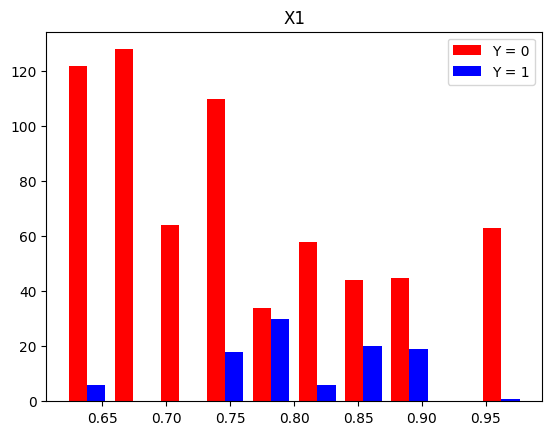

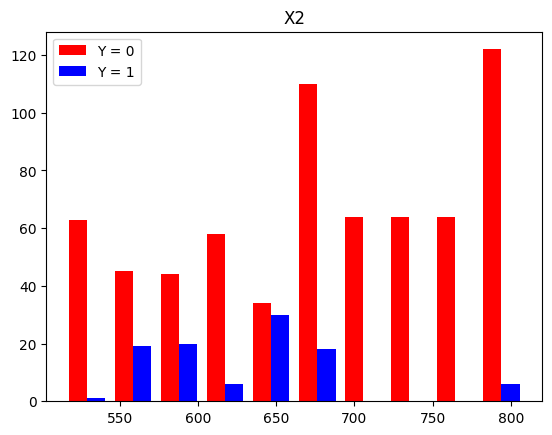

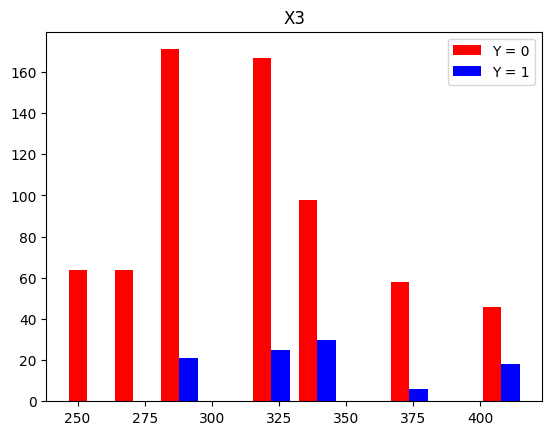

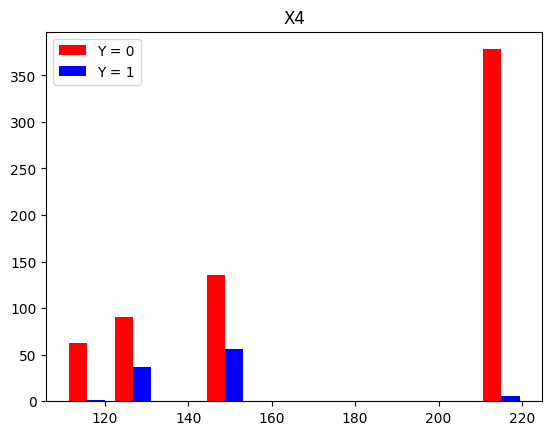

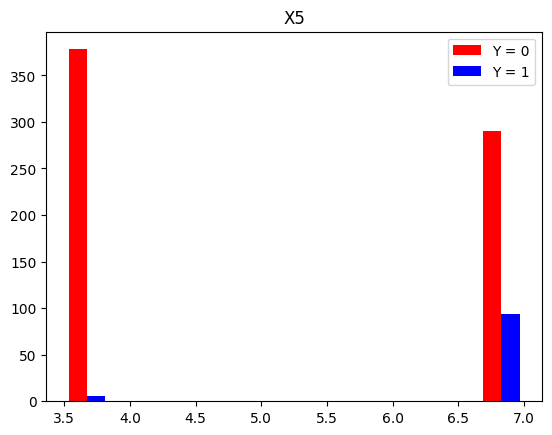

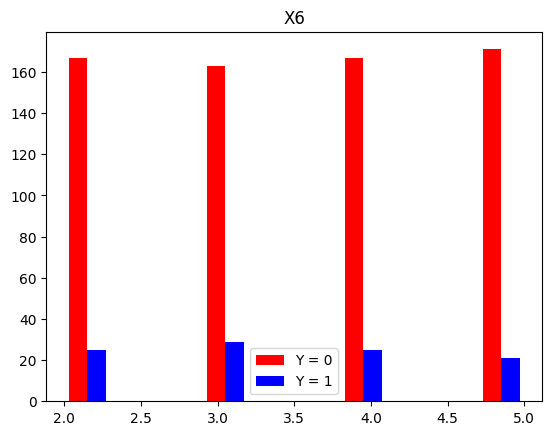

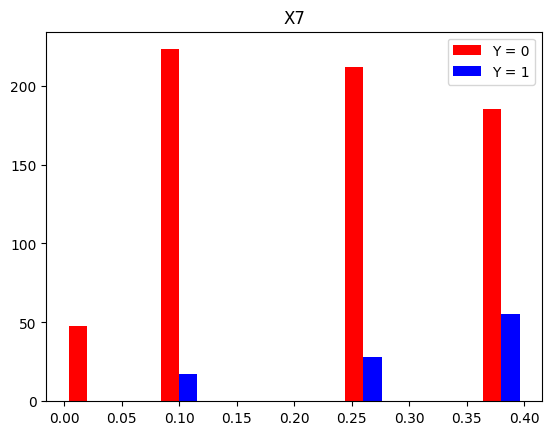

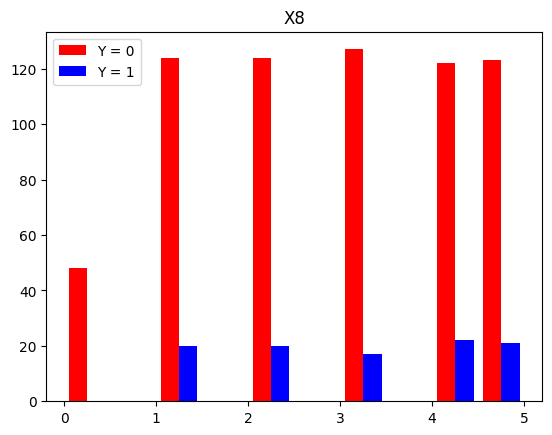

In [228]:
for title in df.columns[:-1]:
    fig, ax = plt.subplots()
    ax.hist([class0[title], class1[title]], label=['Y = 0', 'Y = 1'], color=['red', 'blue'])
    ax.legend()
    ax.set_title(title)
    plt.show()

Based on the generated histograms, X1, X4, and X5 appear to have the highest predictive power.  A low X1 value can lead to a high confidence in a prediction of 0, a large X4 value can lead to a high confidence in a prediction of 0, and a low X5 value can lead to a high confidence in a prediction of 0.

### 2

In [229]:
log_regr = linear_model.LogisticRegression(max_iter=1000)
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(df[df.columns[:-1]], df['Y'], test_size=0.2)


In [230]:
log_regr.fit(log_X_train, log_y_train)
pred = log_regr.predict(log_X_test)

Predicted weights and RMSE are printed below

In [231]:
print("Weights:")
for i in range(len(df.columns)-1):
    print("\t", df.columns[i], ": %.4f" % log_regr.coef_[0][i])

print("\nRMSE: %.2f" % math.sqrt(mean_squared_error(log_y_test, pred)))

Weights:
	 X1 : 0.1015
	 X2 : 0.0134
	 X3 : -0.0013
	 X4 : 0.0073
	 X5 : 1.6006
	 X6 : -0.0785
	 X7 : 3.1094
	 X8 : 0.1133

RMSE: 0.33


### 3

In [232]:
def pdf(x, std, mean): 
    cons = 1.0 / np.sqrt(2*np.pi*(std**2)) 
    pdf_normal_dist = cons*np.exp(-((x-mean)**2)/(2.0*(std**2))) 
    return pdf_normal_dist

In [233]:
def plot_pdf(good_pdf, bad_pdf, ax): 
    ax.fill(x, good_pdf, "g", alpha=0.5) 
    ax.fill(x, bad_pdf,"r", alpha=0.5) 
    ax.set_xlim([-4,6]) 
    ax.set_ylim([0,0.5]) 
    ax.set_title("Probability Distribution", fontsize=14)
    ax.set_ylabel('Counts', fontsize=12) 
    ax.set_xlabel('P(X="bad")', fontsize=12) 
    ax.legend(["good","bad"])

In [234]:
def plot_roc(good_pdf, bad_pdf, ax, threshold): 
    #Total 
    total_bad = np.sum(bad_pdf) 
    total_good = np.sum(good_pdf) 
    #Cumulative sum 
    cum_TP = 0 
    cum_FP = 0 
    #TPR and FPR list initialization 
    TPR_list=[] 
    FPR_list=[] 
    #Iteratre through all values of x 
    for i in range(len(x)): 
        #We are only interested in non-zero values of bad
        if bad_pdf[i]>0: 
            cum_TP+=bad_pdf[len(x)-1-i] 
            cum_FP+=good_pdf[len(x)-1-i] 
        FPR=cum_FP/total_good 
        TPR=cum_TP/total_bad 
        TPR_list.append(TPR) 
        FPR_list.append(FPR) 
    #Calculating AUC, taking the 100 timesteps into account 
    auc=np.sum(TPR_list)/len(x) 
    #Plotting final ROC curve 
    ax.plot(FPR_list, TPR_list) 
    ax.plot(x,x, "--") 
    ax.set_xlim([0,1]) 
    ax.set_ylim([0,1]) 
    ax.set_title("Threshold = " + threshold, fontsize=14) 
    ax.set_ylabel('TPR', fontsize=12) 
    ax.set_xlabel('FPR', fontsize=12) 
    ax.grid() 
    ax.legend(["AUC=%.3f"%auc])
    return auc

In [235]:
def calcPrediction(row):
    prediction = \
        row['X1'] * log_regr.coef_[0][0] + \
        row['X2'] * log_regr.coef_[0][1] + \
        row['X3'] * log_regr.coef_[0][2] + \
        row['X4'] * log_regr.coef_[0][3] + \
        row['X5'] * log_regr.coef_[0][4] + \
        row['X6'] * log_regr.coef_[0][5] + \
        row['X7'] * log_regr.coef_[0][6] + \
        row['X8'] * log_regr.coef_[0][7]

    return prediction

In [252]:
def makeClassification(predictions, threshold):
    good_classes = []
    bad_classes = []

    for prediction in predictions:
        if prediction > threshold:
            good_classes.append(prediction)
        else:
            bad_classes.append(prediction)
    
    return good_classes, bad_classes

In [253]:
predictions = []
df.apply(lambda row: predictions.append(calcPrediction(row)), axis=1);

In [254]:
x = np.linspace(0, 1, num=len(pred)) 

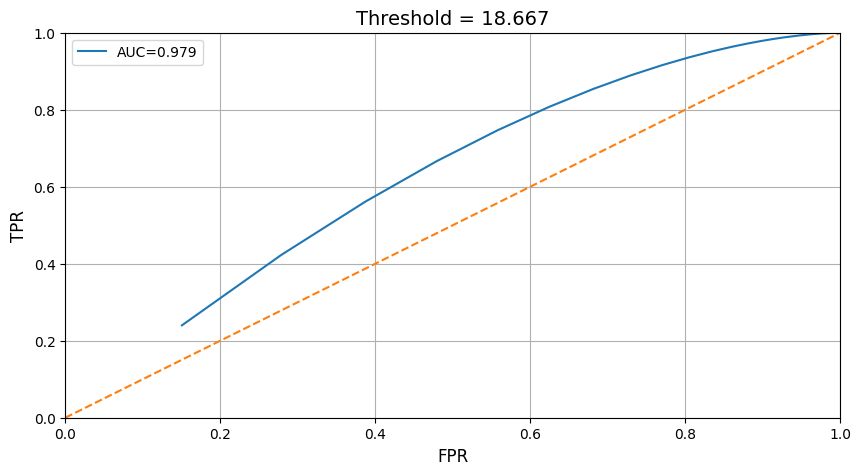

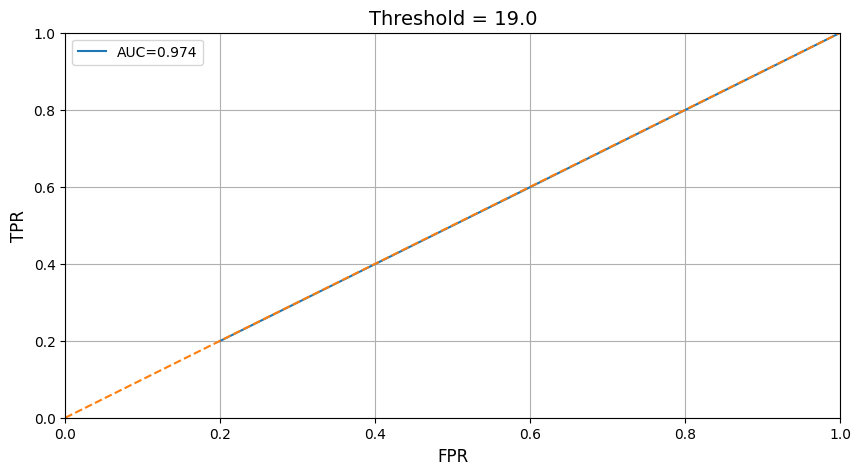

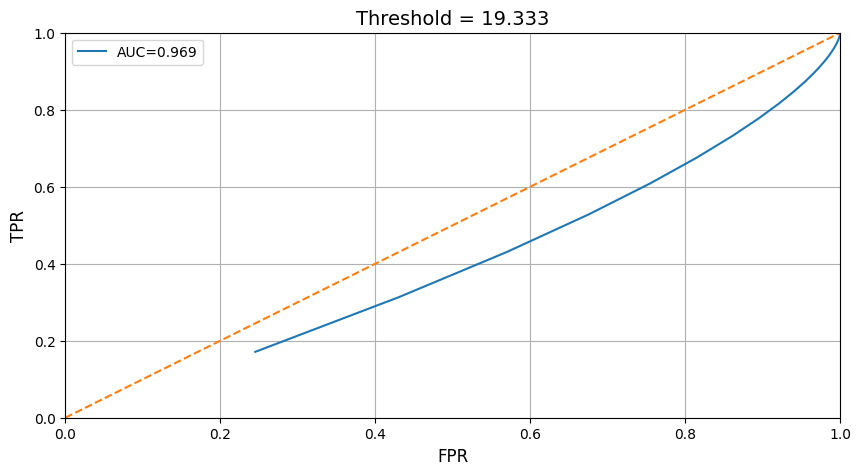

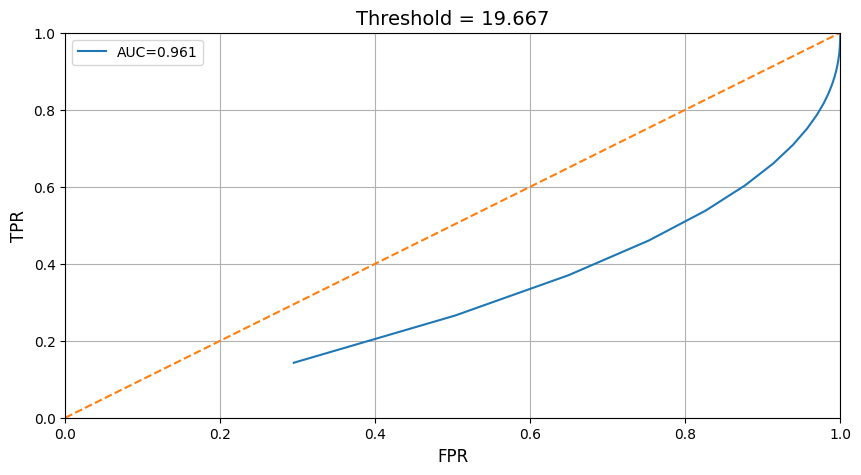

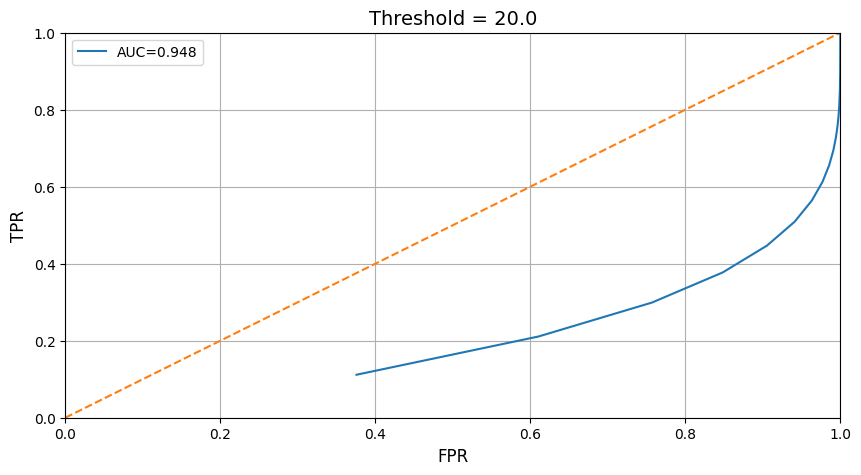

In [258]:
thresholds = []
aucs = []
for i in range(56, 61):
    good_classes, bad_classes = makeClassification(predictions, i/3)

    good_pdf = pdf(x,math.sqrt(np.var(good_classes)),np.mean(good_classes)) 
    bad_pdf = pdf(x,math.sqrt(np.var(bad_classes)),np.mean(bad_classes))

    fig, ax = plt.subplots(1,1, figsize=(10,5))
    thresholds.append(round(i / 3, 3))
    aucs.append(plot_roc(good_pdf, bad_pdf, ax, str(round(i / 3, 3))))
    

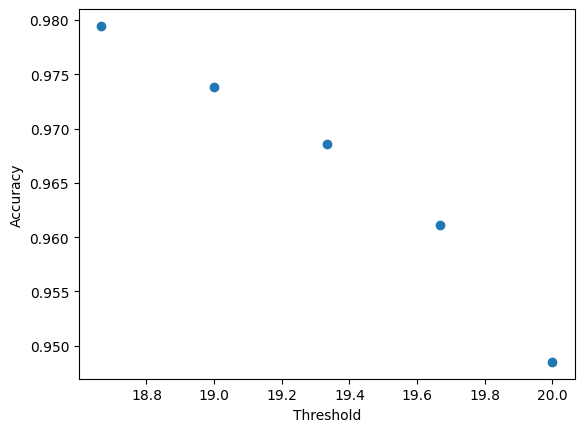

In [259]:
fig, ax = plt.subplots()
ax.scatter(thresholds, aucs)
ax.set_xlabel("Threshold")
ax.set_ylabel("Accuracy")
plt.show()

### 4

In [260]:
bayes_regr_models = []
bayes_X_train, bayes_X_test, bayes_y_train, bayes_y_test = train_test_split(df[df.columns[:-1]], df['Y'], test_size=0.2)
alphaVals = [0.1, 1, 10, 100]

In [261]:
for i in range(len(alphaVals)):
    bayes_regr_models.append(linear_model.BayesianRidge())
    bayes_regr_models[i].set_params(alpha_1 = alphaVals[i])
    bayes_regr_models[i].fit(bayes_X_train, bayes_y_train)

Predicted weights for each value of initial alpha are printed below

In [262]:
for i in range(len(alphaVals)):
    print("Alpha = ", alphaVals[i])
    print("\tWeights:")
    for j in range(0, len(df.columns)-1):
        print("\t\t", df.columns[j], ": ", bayes_regr_models[i].coef_[j])

Alpha =  0.1
	Weights:
		 X1 :  -0.014005999985890707
		 X2 :  0.0016591465830180963
		 X3 :  -0.000619082219160777
		 X4 :  0.0011391144003553913
		 X5 :  0.16165152166072705
		 X6 :  -0.0024982726674646965
		 X7 :  0.3508078259325494
		 X8 :  0.0007025010167645684
Alpha =  1
	Weights:
		 X1 :  -0.01405869397746955
		 X2 :  0.0016594276655753453
		 X3 :  -0.0006194163866298458
		 X4 :  0.001139422025369352
		 X5 :  0.16167743754849803
		 X6 :  -0.0024979810935456016
		 X7 :  0.35121771434963295
		 X8 :  0.0006956267957813084
Alpha =  10
	Weights:
		 X1 :  -0.014584635866181882
		 X2 :  0.0016620729951238738
		 X3 :  -0.0006225963669014999
		 X4 :  0.001142334680217834
		 X5 :  0.16192361734663835
		 X6 :  -0.0024951827793821975
		 X7 :  0.35515736251156144
		 X8 :  0.000629568968107108
Alpha =  100
	Weights:
		 X1 :  -0.019763881454324922
		 X2 :  0.001677642778743186
		 X3 :  -0.0006437502599984019
		 X4 :  0.0011606965180289194
		 X5 :  0.1635313077967385
		 X6 :  -0.002475250442506

R^2 score for each value of initial lambda are printed below

In [263]:
for i in range(len(alphaVals)):
    print("Alpha = ", alphaVals[i])
    print("\tScore: ", bayes_regr_models[i].score(bayes_X_test, bayes_y_test))

Alpha =  0.1
	Score:  0.24035066531301108
Alpha =  1
	Score:  0.2403968052334844
Alpha =  10
	Score:  0.24083769216329343
Alpha =  100
	Score:  0.24385675707122723


### 5

In [264]:
cv = KFold(n_splits=10) 

#use LOOCV to evaluate model
scores = cross_val_score(bayes_regr_models[0], bayes_X_train, bayes_y_train, scoring='neg_mean_squared_error', cv=cv)

#view RMSE
print("Alpha = 0.1 RMSE: ", math.sqrt(np.mean(np.abs(scores))))

Alpha = 0.1 RMSE:  0.29920542255332216


In [265]:
cv = KFold(n_splits=10) 

#use LOOCV to evaluate model
scores = cross_val_score(bayes_regr_models[1], bayes_X_train, bayes_y_train, scoring='neg_mean_squared_error', cv=cv)

#view RMSE
print("Alpha = 1 RMSE: ", math.sqrt(np.mean(np.abs(scores))))

Alpha = 1 RMSE:  0.29920036246392206


In [266]:
cv = KFold(n_splits=10) 

#use LOOCV to evaluate model
scores = cross_val_score(bayes_regr_models[2], bayes_X_train, bayes_y_train, scoring='neg_mean_squared_error', cv=cv)

#view RMSE
print("Alpha = 10 RMSE: ", math.sqrt(np.mean(np.abs(scores))))

Alpha = 10 RMSE:  0.2991525855261745


In [267]:
cv = KFold(n_splits=10) 

#use LOOCV to evaluate model
scores = cross_val_score(bayes_regr_models[3], bayes_X_train, bayes_y_train, scoring='neg_mean_squared_error', cv=cv)

#view RMSE
print("Alpha = 100 RMSE: ", math.sqrt(np.mean(np.abs(scores))))

Alpha = 100 RMSE:  0.298878940321072


### 6

Based on the above experiment, the model with the higest accuracy (lowest RMSE) is the model with the inital alpha of 100

In [299]:
std = np.std(bayes_regr_models[0].predict(df[df.columns[:-1]]))
sum = st.norm.cdf(bayes_regr_models[0].predict([[0.8,600.0,286.0,138.1,5,4,0.25,0]])[0] / std)
sum = sum + st.norm.cdf(bayes_regr_models[0].predict([[0.67,630.0,296.0,238.1,2,6,0.5,3]])[0] / std)
print("Probability for alpha = 0.1: ", sum/2)

Probability for alpha = 0.1:  0.15709784017253495


C:\Users\Mago Sheehy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
C:\Users\Mago Sheehy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


In [300]:
std = np.std(bayes_regr_models[1].predict(df[df.columns[:-1]]))
sum = st.norm.cdf(bayes_regr_models[1].predict([[0.8,600.0,286.0,138.1,5,4,0.25,0]])[0] / std)
sum = sum + st.norm.cdf(bayes_regr_models[1].predict([[0.67,630.0,296.0,238.1,2,6,0.5,3]])[0] / std)
print("Probability for alpha = 1: ", sum/2)

Probability for alpha = 1:  0.15711870414254925


C:\Users\Mago Sheehy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
C:\Users\Mago Sheehy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


In [301]:
std = np.std(bayes_regr_models[2].predict(df[df.columns[:-1]]))
sum = st.norm.cdf(bayes_regr_models[2].predict([[0.8,600.0,286.0,138.1,5,4,0.25,0]])[0] / std)
sum = sum + st.norm.cdf(bayes_regr_models[2].predict([[0.67,630.0,296.0,238.1,2,6,0.5,3]])[0] / std)
print("Probability for alpha = 10: ", sum/2)

Probability for alpha = 10:  0.1573275621082697


C:\Users\Mago Sheehy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
C:\Users\Mago Sheehy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


In [302]:
std = np.std(bayes_regr_models[3].predict(df[df.columns[:-1]]))
sum = st.norm.cdf(bayes_regr_models[3].predict([[0.8,600.0,286.0,138.1,5,4,0.25,0]])[0] / std)
sum = sum + st.norm.cdf(bayes_regr_models[3].predict([[0.67,630.0,296.0,238.1,2,6,0.5,3]])[0] / std)
print("Probability for alpha = 100: ", sum/2)

Probability for alpha = 100:  0.15929699378864798


C:\Users\Mago Sheehy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
C:\Users\Mago Sheehy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


Based on the above experiment, the model with the higest probability is the model with the inital alpha of 100